In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
# Load the dataset
df = pd.read_csv('/home/user01/Data/roads/NNNPedestrian Accidents_translated-Yasir_Laptop.csv')
df.columns = df.columns.str.strip()
# Replace unknowns represented by 9 with NaN
df.replace(9,pd.NA, inplace=True) # pd.NA

# Create new grouped features
df['Season'] = df[['Winter', 'Spring', 'Summer', 'Autumn']].idxmax(axis=1)
df['Ped_Involved'] = df[['Ped_Involved_1', 'Ped_Involved_2', 'Ped_Involved_3', 'Ped_Involved_4']].idxmax(axis=1)
df['Ped_Age'] = df[['Pedestrian age_18orAbove', 'Pedestrian age_Below18']].idxmax(axis=1)
df['Ped_Gender'] = df[['PedGend_M', 'PedGend_F', 'PedGend_M/F']].idxmax(axis=1)
# df['VehicleInvolved'] = df[['VehicleInvolved_Car', 'VehcileInvolved_Two Wheeler', 'VehicleInvolved_Heavy Vehicles', 'VehicleInvolved_Accident that did not involve other vehicles', 'VehicleInvolved_Tram']].idxmax(axis=1)
df['DriverAge'] = df[['DriverAge_18orabove', 'DriverAge_Below18']].idxmax(axis=1)
df['DriverGender'] = df[['DriverGender_M', 'DriverGender_F']].idxmax(axis=1)
df['Ped_Behv'] = df[['Ped_Behv_at the road', 'Ped_Behv_at the Side walk', 'Ped_Behv_Crossing The Street', 'Ped_Behv_Bus Entry/Exit', 'Ped_Behv_Entering to Car']].idxmax(axis=1)
df['NatureofIncident'] = df[['NatureofIncident_Opponent hit the pedestrian', 'NatureofIncident_Opponent hit the pedestrian while driving backside', 'NatureofIncident_Pedestrian fell down', 'NatureofIncident_Pedestrian Involved in another accidents']].idxmax(axis=1)
df['AccidentDynamics'] = df[['AccidentDynamics_Driver', 'AccidentDynamics_Pedestrian', 'AccidentDynamics_Driver / Pedestrian', 'AccidentDynamics_Driver / Infrastructural', 'AccidentDynamics_Environmental',
                             'AccidentDynamics_Infrastructural']].idxmax(axis=1)
df['CrossWalk'] = df[['Accidents happened at the crosswalk_Yes', 'Accidents happened at the crosswalk_No']].idxmax(axis=1)
df['RoadFeature'] = df[['RoadFeature_Curved section of road', 'RoadFeature_Intersection', 'RoadFeature_Roundabout', 'RoadFeature_Straight section of road',
                        'RoadFeature_Traffic light-controlled intersection']].idxmax(axis=1)
df['RoadSurface'] = df[['RoadSurface_Asphalt', 'RoadSurface_Paved with cobblestones', 'RoadSurface_Unpaved Road']].idxmax(axis=1)
df['RoadType'] = df[['RoadType_One way road-way', 'RoadType_Two way road-way', 'RoadType_Dual Carriageway', 'RoadType_single or dual carriageway with service road']].idxmax(axis=1)
df['RoadSurf'] = df[['RoadSurf_Dry', 'RoadSurf_Wet']].idxmax(axis=1)
df['Weather'] = df[['Weather_Clear', 'Weather_Cloudy', 'Weather_Rainy']].idxmax(axis=1)
df['Lighting'] = df[['Lighting_Sufficient', 'Lighting_In Sufficient']].idxmax(axis=1)
df['TrafficLights'] = df[['TraffLights_Functional', 'TraffLights_Not present', 'Yes - there is pedestrian specific signs/signals']].idxmax(axis=1)
df['Visibility'] = df[['VisbilityCond_Good', 'VisbilityCond_In Sufficient']].idxmax(axis=1)
df['TrafficCondition'] = df[['TraffCondition_Normal', 'TraffCondition_Intense']].idxmax(axis=1)
df['DayofWeek'] = df[['Weekdays', 'Weekends']].idxmax(axis=1)
# Repeat similar grouping for other features

def map_columns_to_numeric(df, columns_dict):
    for new_col, col_list in columns_dict.items():
        # Check if all columns in the row are zero, and set to pd.NA
        mask_all_zeros = df[col_list].sum(axis=1) == 0
        df[new_col] = df[col_list].idxmax(axis=1).map({col: i for i, col in enumerate(col_list)})
        df.loc[mask_all_zeros, new_col] = pd.NA
    return df

columns_dict = {

    'VehicleInvolved': ['VehicleInvolved_Tram', 'VehicleInvolved_Heavy Vehicles', 'VehicleInvolved_Accident that did not involve other vehicles',
                            'VehcileInvolved_Two Wheeler', 'VehicleInvolved_Car'],
}

# Apply the function to your DataFrame
df = map_columns_to_numeric(df, columns_dict)

# Define the order of the seasons as a list
# season_order = ['VehicleInvolved_Tram', 'VehicleInvolved_Heavy Vehicles', 'VehicleInvolved_Accident that did not involve other vehicles',
#                             'VehcileInvolved_Two Wheeler', 'VehicleInvolved_Car']

# # Find the column with the maximum value and map it to the corresponding numerical index
# df['VehicleInvolved'] = df[season_order].idxmax(axis=1).map({season: i for i, season in enumerate(season_order)})


# Drop the original one-hot encoded columns
df.drop(columns=['Winter', 'Spring', 'Summer', 'Autumn',
                'Ped_Involved_1', 'Ped_Involved_2', 'Ped_Involved_3', 'Ped_Involved_4',
                'Pedestrian age_18orAbove', 'Pedestrian age_Below18',
                'PedGend_M', 'PedGend_F', 'PedGend_M/F',
                'VehicleInvolved_Car', 'VehcileInvolved_Two Wheeler', 'VehicleInvolved_Heavy Vehicles', 'VehicleInvolved_Accident that did not involve other vehicles', 'VehicleInvolved_Tram',
                'DriverAge_18orabove', 'DriverAge_Below18',
                'DriverGender_M', 'DriverGender_F',
                'Ped_Behv_at the road', 'Ped_Behv_at the Side walk', 'Ped_Behv_Crossing The Street', 'Ped_Behv_Bus Entry/Exit', 'Ped_Behv_Entering to Car',
                'NatureofIncident_Opponent hit the pedestrian', 'NatureofIncident_Opponent hit the pedestrian while driving backside', 'NatureofIncident_Pedestrian fell down', 'NatureofIncident_Pedestrian Involved in another accidents',
                'AccidentDynamics_Driver', 'AccidentDynamics_Pedestrian', 'AccidentDynamics_Driver / Pedestrian', 'AccidentDynamics_Driver / Infrastructural', 'AccidentDynamics_Environmental',
                'AccidentDynamics_Infrastructural',
                'Accidents happened at the crosswalk_Yes', 'Accidents happened at the crosswalk_No',
                'RoadFeature_Curved section of road', 'RoadFeature_Intersection', 'RoadFeature_Roundabout', 'RoadFeature_Straight section of road',
                'RoadFeature_Traffic light-controlled intersection',
                'RoadSurface_Asphalt', 'RoadSurface_Paved with cobblestones', 'RoadSurface_Unpaved Road',
                'RoadType_One way road-way', 'RoadType_Two way road-way', 'RoadType_Dual Carriageway', 'RoadType_single or dual carriageway with service road',
                'RoadSurf_Dry', 'RoadSurf_Wet',
                'Weather_Clear', 'Weather_Cloudy', 'Weather_Rainy',
                'Lighting_Sufficient', 'Lighting_In Sufficient',
                'TraffLights_Functional', 'TraffLights_Not present',
                'VisbilityCond_Good', 'VisbilityCond_In Sufficient',
                'TraffCondition_Normal', 'TraffCondition_Intense',
                'Yes - there is pedestrian specific signs/signals',
                'Weekdays', 'Weekends'], inplace=True)
# replace 0 with day and 1 with night in Day/Night Time column
df['Day/Night Time'] = df['Day/Night Time'].replace({0: 'Day', 1: 'Night'})
# List of categorical features
categorical_features = list(df.columns) # list of all columns
del [categorical_features[1]] # remove the target column Injury Severity
print(categorical_features)





['Day/Night Time', 'Season', 'Ped_Involved', 'Ped_Age', 'Ped_Gender', 'DriverAge', 'DriverGender', 'Ped_Behv', 'NatureofIncident', 'AccidentDynamics', 'CrossWalk', 'RoadFeature', 'RoadSurface', 'RoadType', 'RoadSurf', 'Weather', 'Lighting', 'TrafficLights', 'Visibility', 'TrafficCondition', 'DayofWeek', 'VehicleInvolved']


In [2]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelEncoder

class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self,col):
        #List of column names in the DataFrame that should be encoded
        self.col = col
        #Dictionary storing a LabelEncoder for each column
        self.le_dic = {}
        for el in self.col:
            self.le_dic[el] = LabelEncoder()

    def fit(self,x,y=None):
        #Fill missing values with the string 'NaN'
        x[self.col] = x[self.col].fillna('NaN')
        for el in self.col:
            #Only use the values that are not 'NaN' to fit the Encoder
            a = x[el][x[el]!='NaN']
            self.le_dic[el].fit(a)
        return self

    def transform(self,x,y=None):
        #Fill missing values with the string 'NaN'
        x[self.col] = x[self.col].fillna('NaN')
        for el in self.col:
            #Only use the values that are not 'NaN' to fit the Encoder
            a = x[el][x[el]!='NaN']
            #Store an ndarray of the current column
            b = x[el].to_numpy()
            #Replace the elements in the ndarray that are not 'NaN'
            #using the transformer
            b[b!='NaN'] = self.le_dic[el].transform(a)
            #Overwrite the column in the DataFrame
            x[el]=b
        #return the transformed DataFrame
        return x

In [3]:

cle = CustomLabelEncoder(categorical_features)
cle.fit(df)
df = cle.transform(df)

df.replace('NaN', np.nan, inplace=True) # pd.NA

/tmp/ipykernel_71698/3995369003.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('NaN', np.nan, inplace=True) # pd.NA


In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, SimpleImputer, KNNImputer, IterativeImputer

'''
Iterative Imputer
'''
iter_imputer = IterativeImputer(missing_values=np.nan, random_state=42)
df_imputed = pd.DataFrame(iter_imputer.fit_transform(df), columns=df.columns)
'''
KNN Imputer
'''
# knn_imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
# df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
'''
Simple Imputer
'''
# simple_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
# df_imputed = pd.DataFrame(simple_imputer.fit_transform(df), columns=df.columns)

'\nSimple Imputer\n'

In [7]:
X_train.dtypes

Day/Night Time      float64
Season              float64
Ped_Involved        float64
Ped_Age             float64
Ped_Gender          float64
VehicleInvolved     float64
DriverAge           float64
DriverGender        float64
Ped_Behv            float64
NatureofIncident    float64
AccidentDynamics    float64
CrossWalk           float64
RoadFeature         float64
RoadSurface         float64
RoadType            float64
RoadSurf            float64
Weather             float64
Lighting            float64
TrafficLights       float64
Visibility          float64
TrafficCondition    float64
DayofWeek           float64
dtype: object

In [5]:
# Separate features and target
X = df_imputed.drop(columns=['Injury_Severity'])
y = df_imputed['Injury_Severity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [104]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
catboost_model = CatBoostClassifier(verbose=False)

# Define the parameters for grid search
param_grid = {
    'iterations': [1000],#, 500, 1000],
    'depth': [10],#, 6, 10],
    'learning_rate': [0.01],#, 0.1, 0.2],
    'l2_leaf_reg': [1],#, 3, 5, 7]
}

# Perform grid search
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, scoring='f1_macro', cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train_res, y_train_res)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)


Best Parameters:  {'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.01}


In [6]:
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

best_params = {'depth': 10, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.01}

# Train the model with the best parameters
best_catboost_model = CatBoostClassifier(**best_params, eval_metric='Logloss', verbose=False)
best_catboost_model.fit(X_train_res, y_train_res, eval_set=(X_test, y_test), plot=True)

# Retrieve and plot the loss
results = best_catboost_model.get_evals_result()
# 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

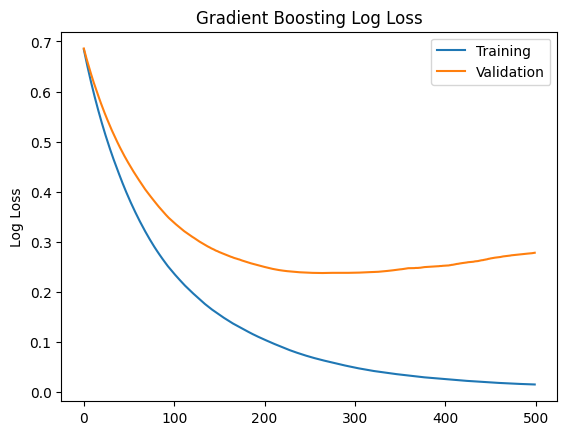

Accuracy: 0.9175
F1 Score (Micro): 0.9175
F1 Score (Macro): 0.7237048665620094
AUC: 0.7625299314672613


In [27]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

best_params_gb = {
    'max_depth': 10,
    'n_estimators': 500,
    'learning_rate': 0.01,
    'loss': 'log_loss'  # 'deviance' is equivalent to logistic regression for classification
}

# Train the GradientBoostingClassifier with the best parameters
best_gb_model = GradientBoostingClassifier(**best_params_gb)
best_gb_model.fit(X_train_res, y_train_res)

# Retrieve and plot the loss
train_loss = []
val_loss = []

for i, y_pred in enumerate(best_gb_model.staged_predict_proba(X_train_res)):
    train_loss.append(log_loss(y_train_res, y_pred))

for i, y_pred in enumerate(best_gb_model.staged_predict_proba(X_test)):
    val_loss.append(log_loss(y_test, y_pred))

plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.legend()
plt.ylabel('Log Loss')
plt.title('Gradient Boosting Log Loss')
plt.show()

y_pred = best_gb_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_catboost_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Macro): {f1_macro}")
print(f"AUC: {auc}")


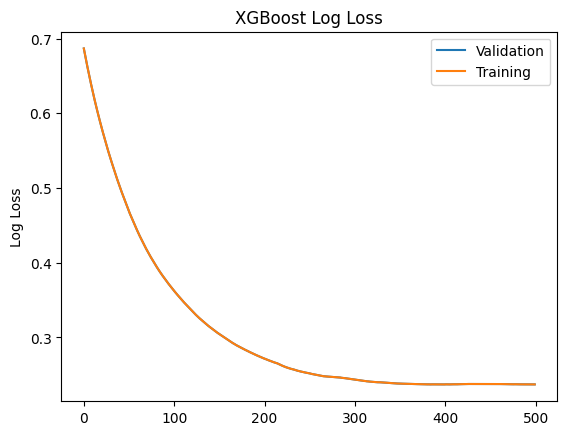

Accuracy: 0.925
F1 Score (Micro): 0.925
F1 Score (Macro): 0.7297297297297297
AUC: 0.7707868879531006


In [19]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

best_params_xgb = {
    'max_depth': 10,
    'n_estimators': 500,
    'reg_lambda': 1,
    'learning_rate': 0.01,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the XGBoost model with the best parameters
best_xgb_model = xgb.XGBClassifier(**best_params_xgb)
best_xgb_model.fit(X_train_res, y_train_res, eval_set=[(X_test, y_test)], verbose=False)

# Plot training and validation loss
results = best_xgb_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
plt.plot(x_axis, results['validation_0']['logloss'], label='Validation')
plt.plot(x_axis, results['validation_0']['logloss'], label='Training')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Macro): {f1_macro}")
print(f"AUC: {auc}")

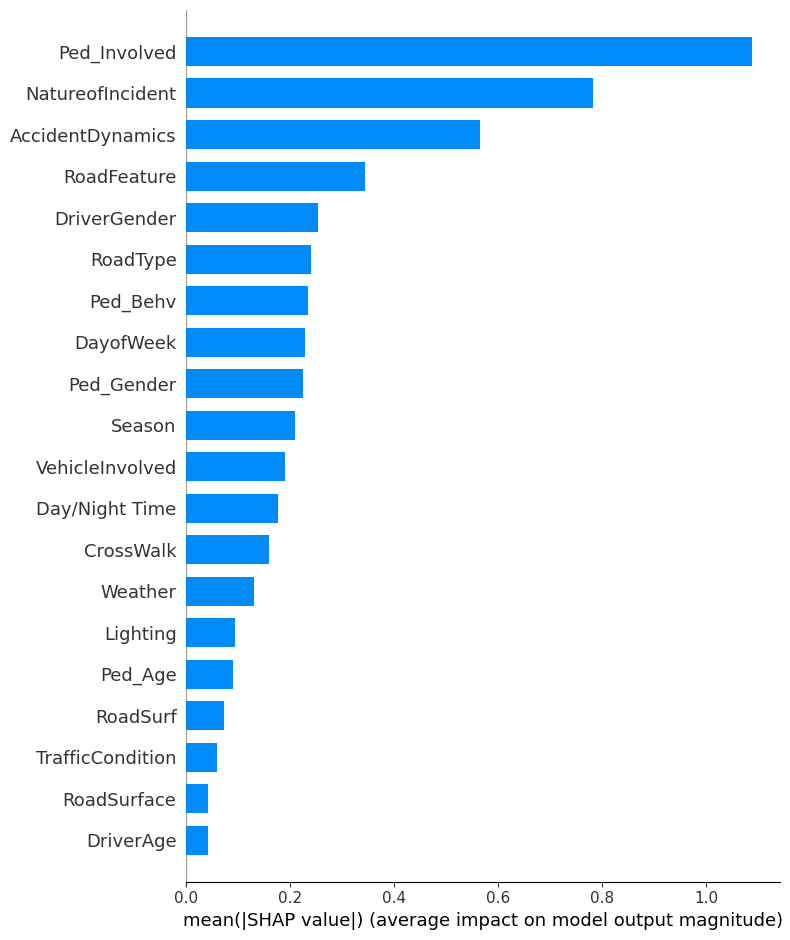

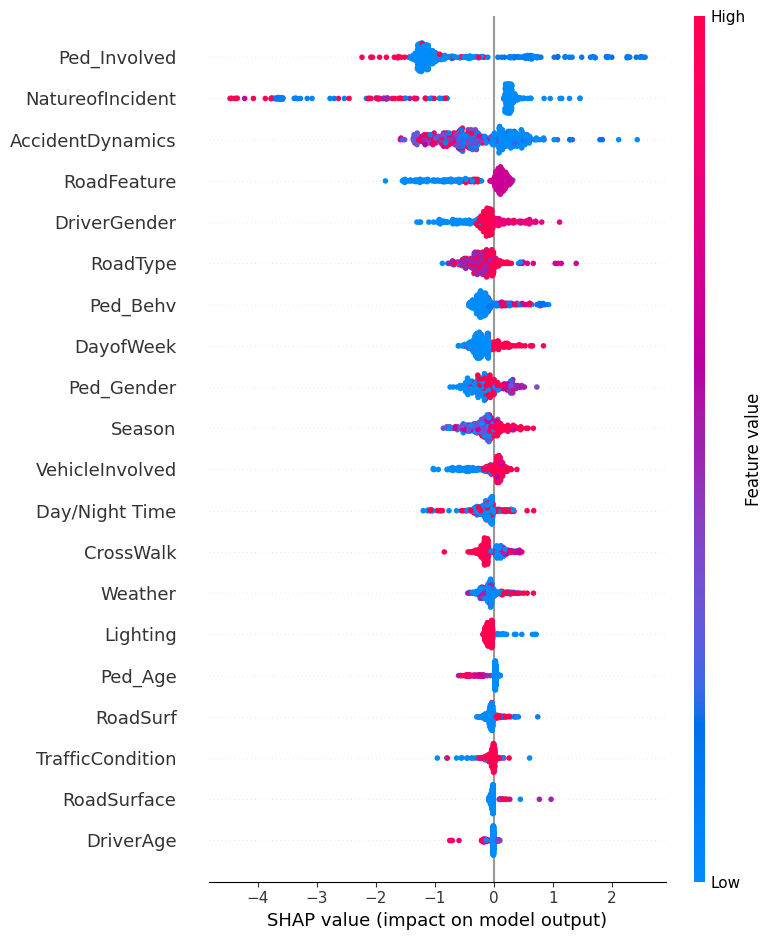

In [32]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")    # shap_values[:,:,1] for random forest shape is important
shap.summary_plot(shap_values, X_test)


In [7]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Train the model with the best parameters
best_catboost_model = CatBoostClassifier(**best_params, verbose=False)
best_catboost_model.fit(X_train_res, y_train_res)

# Make predictions
y_pred = best_catboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_catboost_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Macro): {f1_macro}")
print(f"AUC: {auc}")


Accuracy: 0.9425
F1 Score (Micro): 0.9425
F1 Score (Macro): 0.7591559988481373
AUC: 0.7596399966972174


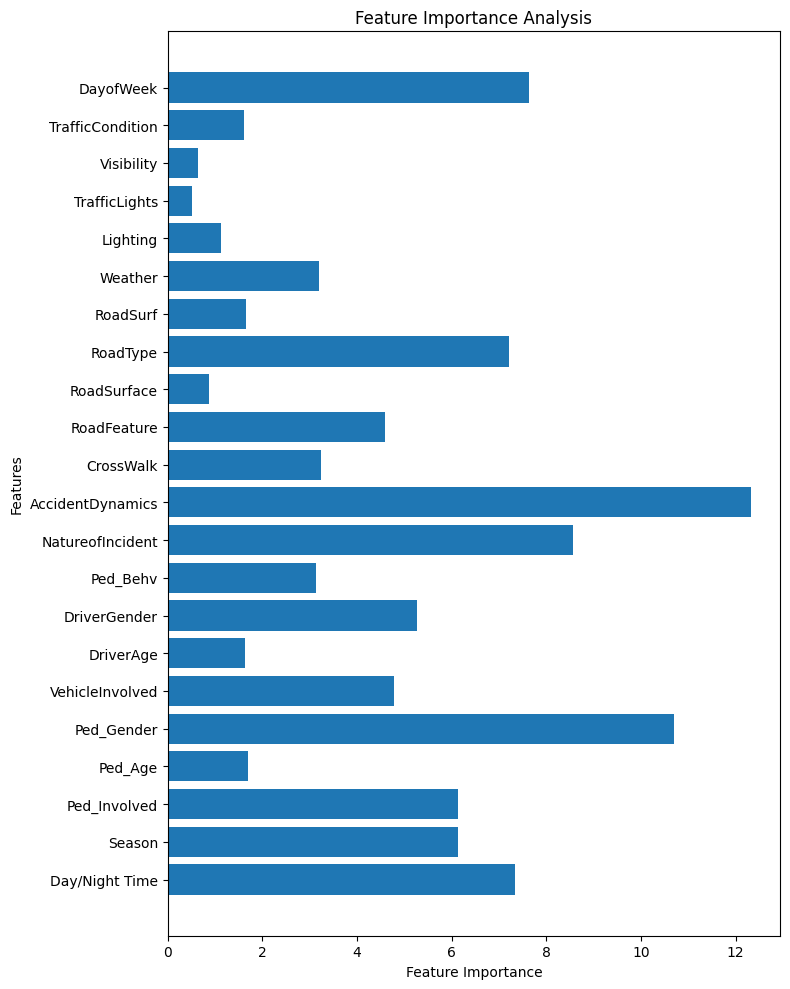

In [14]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = best_catboost_model.get_feature_importance()
features = X.columns

# Plot feature importance
plt.figure(figsize=(8, 10))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.tight_layout()
plt.show()

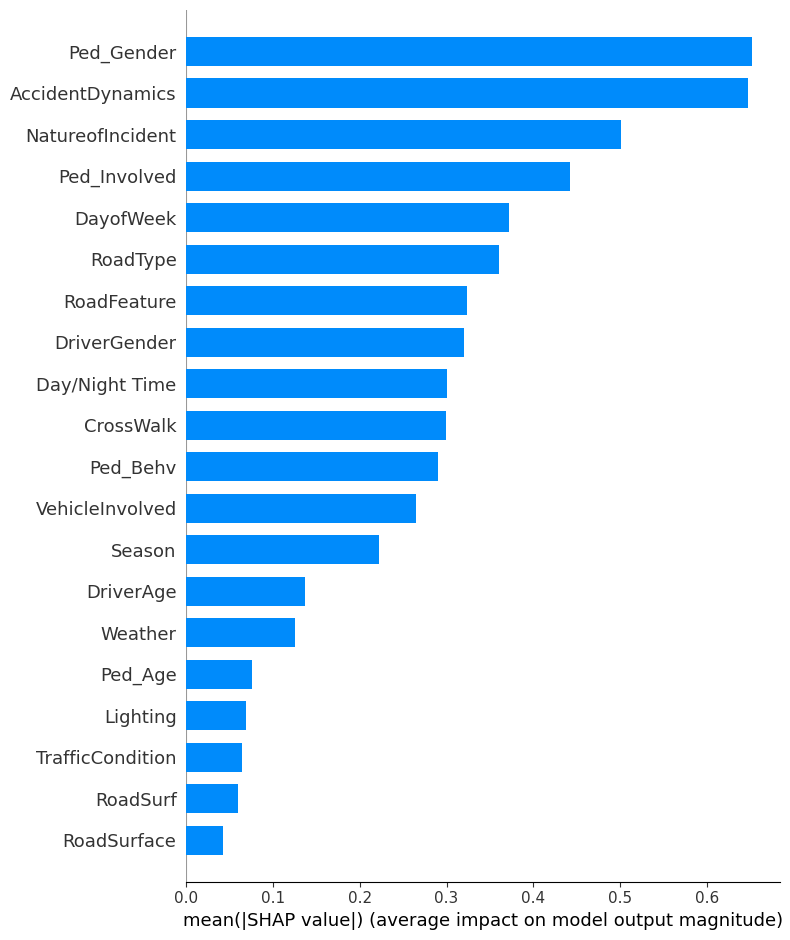

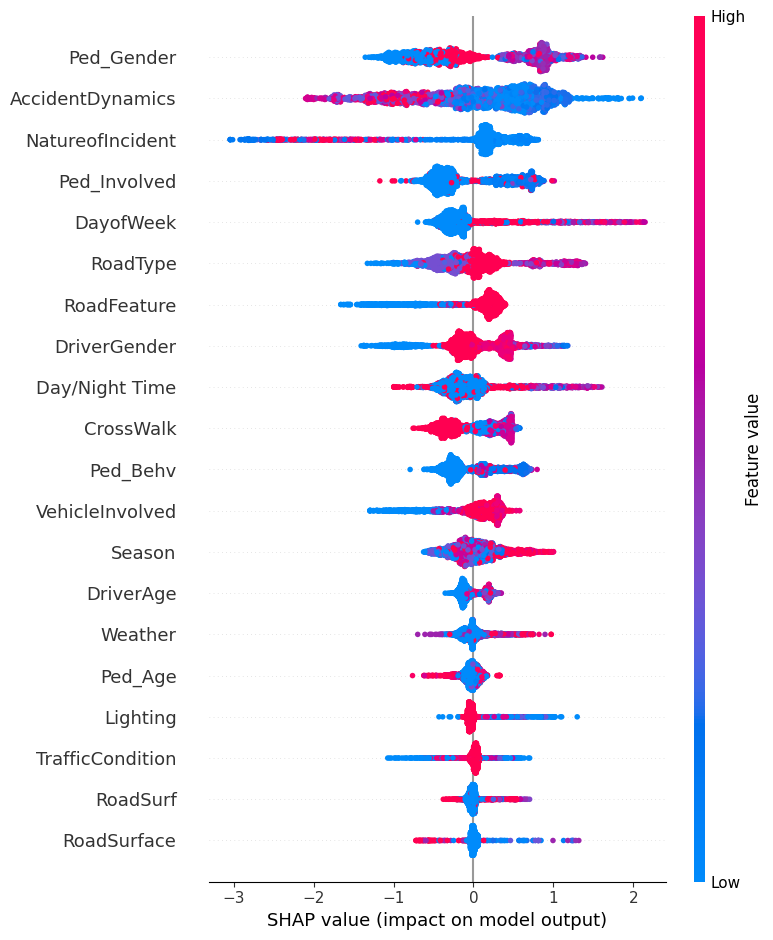

In [9]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_catboost_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


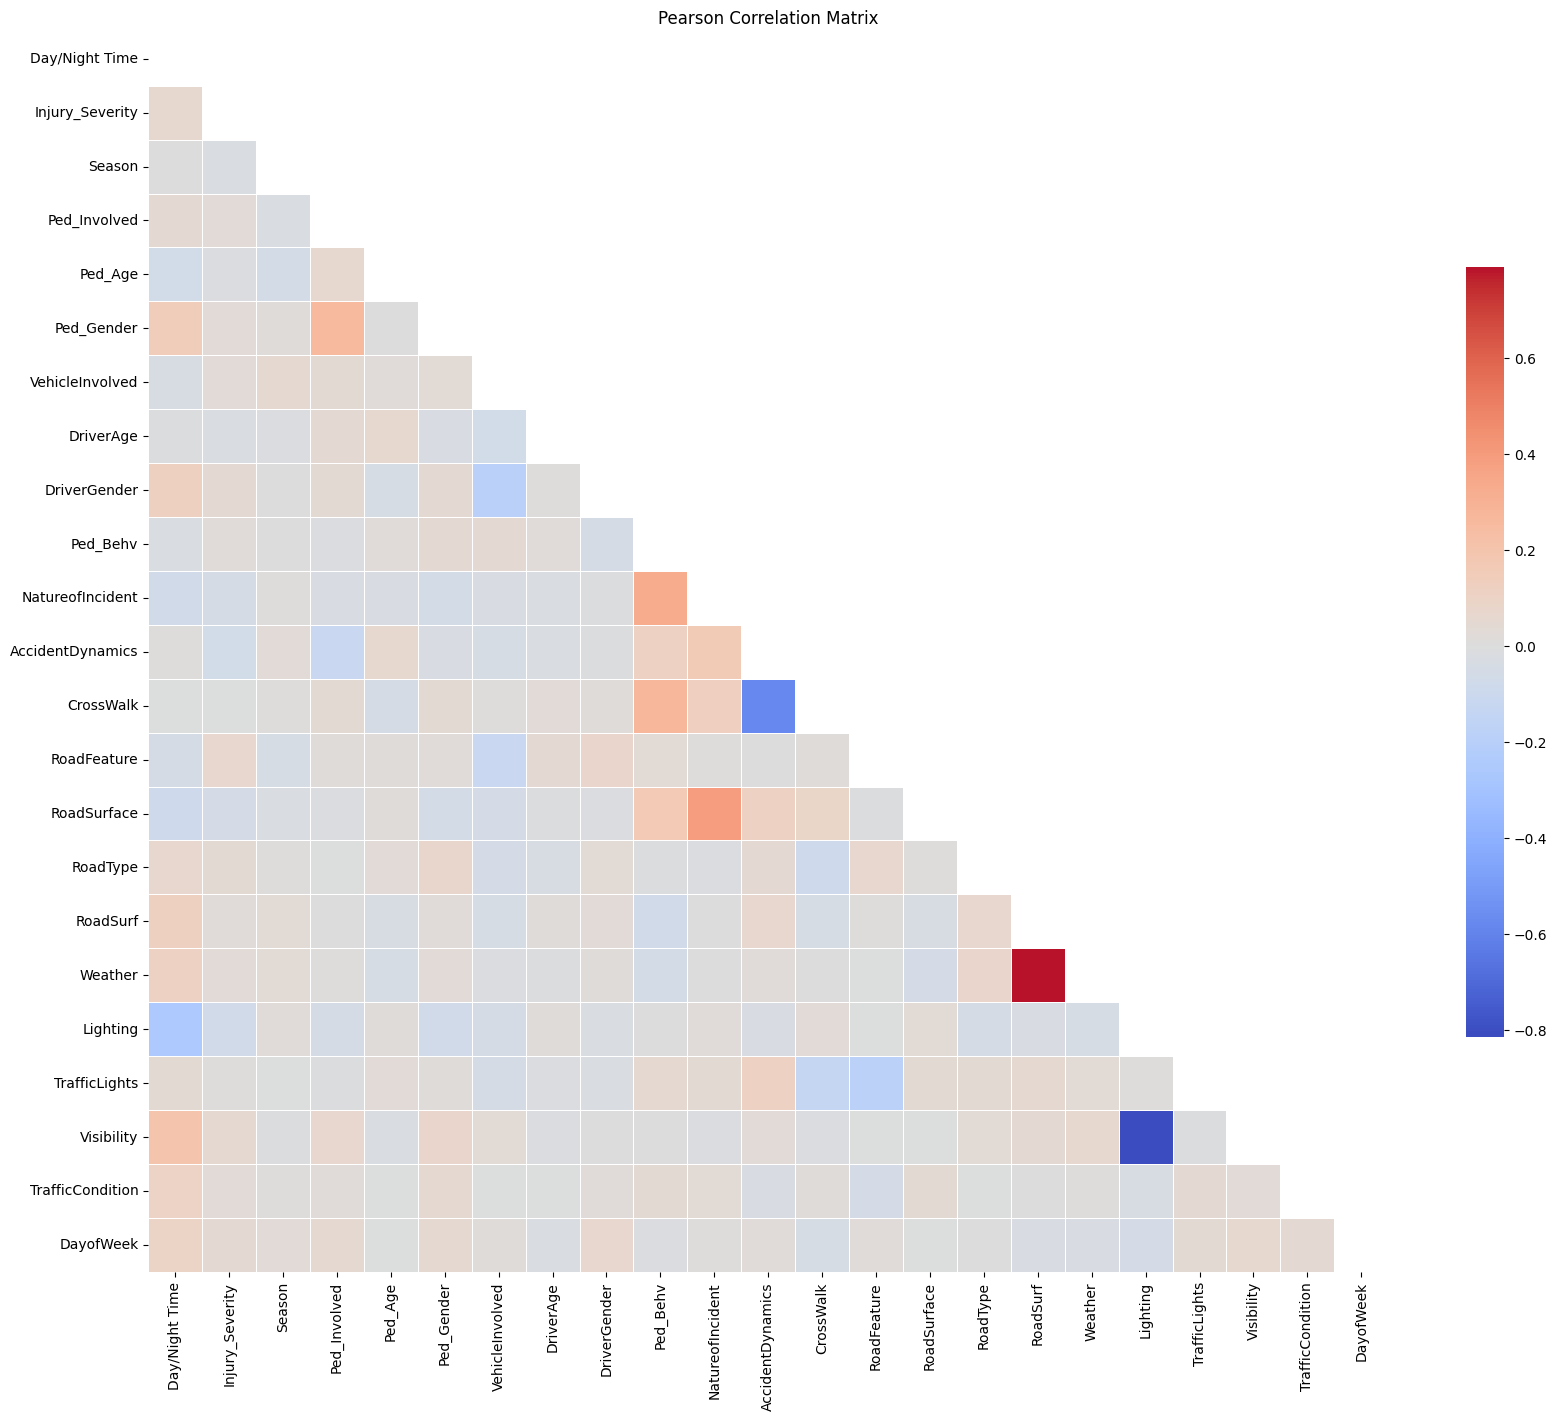

In [16]:
import seaborn as sns
import numpy as np

# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Plot the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Pearson Correlation Matrix')
plt.show()


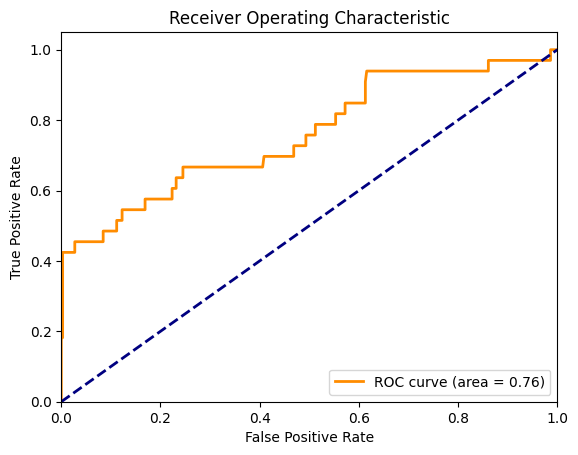

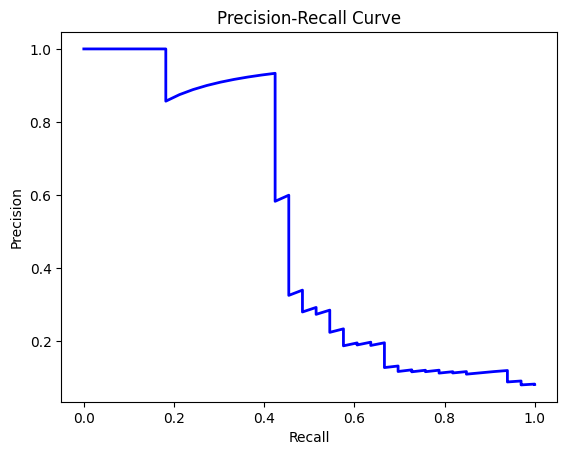

In [17]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Predictions and probabilities
y_pred = best_catboost_model.predict(X_test)
y_proba = best_catboost_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


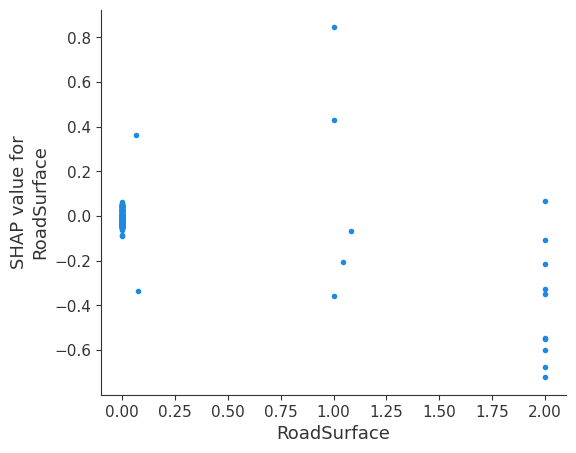

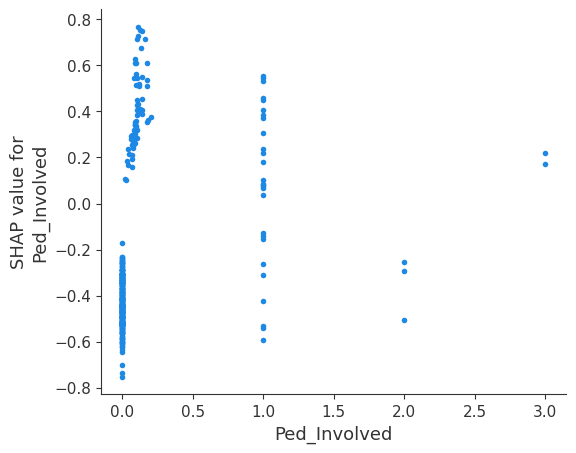

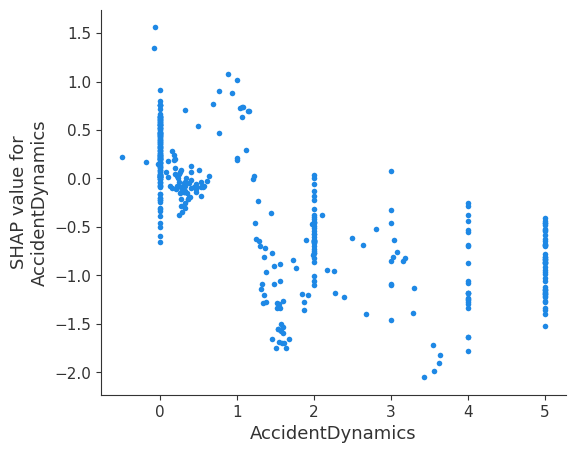

In [18]:
# X_test.columns = X_test.columns.str.strip()
explainer = shap.TreeExplainer(best_catboost_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot for overall feature importance
# shap.summary_plot(shap_values, X_test, plot_type="bar", class_names= ['severe', 'not-severe', 'fatal'],
#                   feature_names = X.columns)

shap.dependence_plot("RoadSurface", shap_values, X_test, interaction_index=None)
shap.dependence_plot("Ped_Involved", shap_values, X_test, interaction_index=None)
shap.dependence_plot("AccidentDynamics", shap_values, X_test, interaction_index=None)


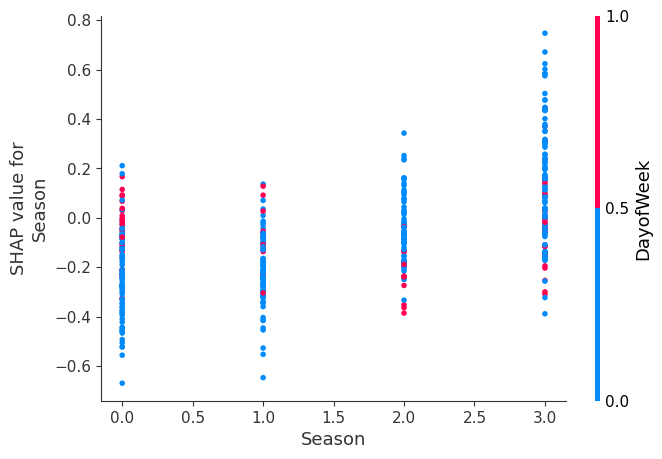

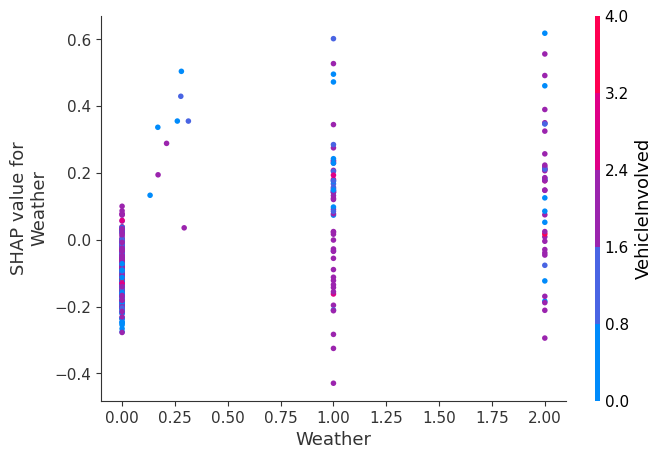

In [19]:
shap.dependence_plot("Season", shap_values, X_test, interaction_index="DayofWeek")
shap.dependence_plot("Weather", shap_values, X_test, interaction_index="VehicleInvolved")

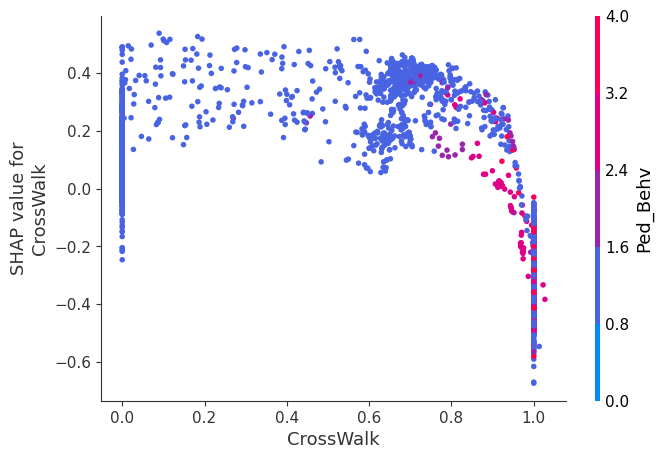

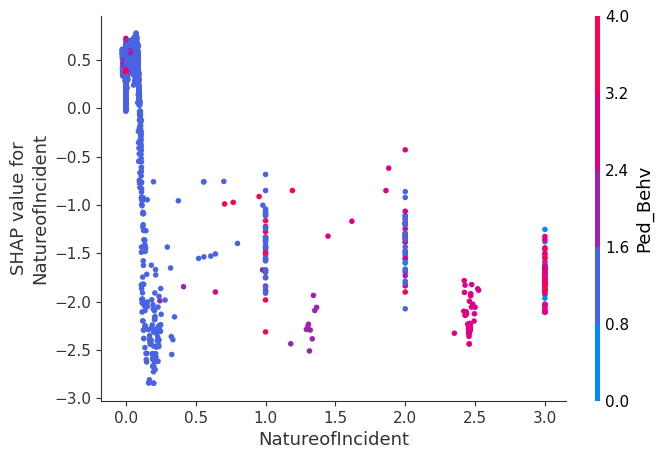

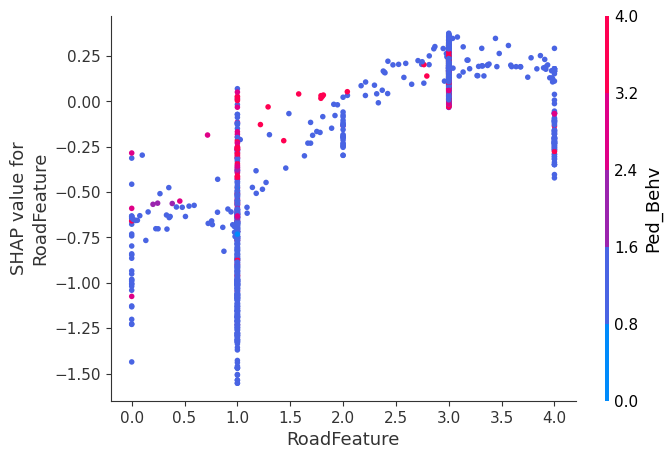

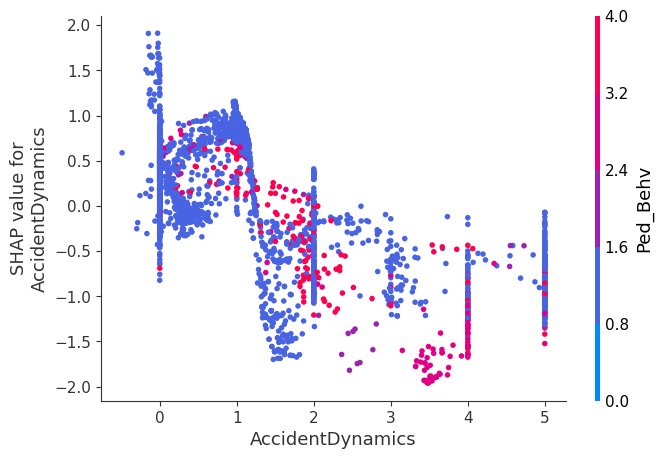

In [53]:
# relationship_decoding = {
#     0: 'One way road-way',
#     1: 'Two way road-way',
#     2: 'Carriageway',
#     3: 'Carriageway with service road',
# }

# X_cat = X_test.copy()
# X_cat['RoadType'] = X_cat['RoadType'].map(relationship_decoding)

explainer = shap.TreeExplainer(best_catboost_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_train_res)
# plot with the actual feature names
shap.dependence_plot("CrossWalk", shap_values, X_train_res, interaction_index="Ped_Behv")
shap.dependence_plot("NatureofIncident", shap_values, X_train_res, interaction_index="Ped_Behv")
shap.dependence_plot("RoadFeature", shap_values, X_train_res, interaction_index="Ped_Behv")
shap.dependence_plot("AccidentDynamics", shap_values, X_train_res, interaction_index="Ped_Behv")


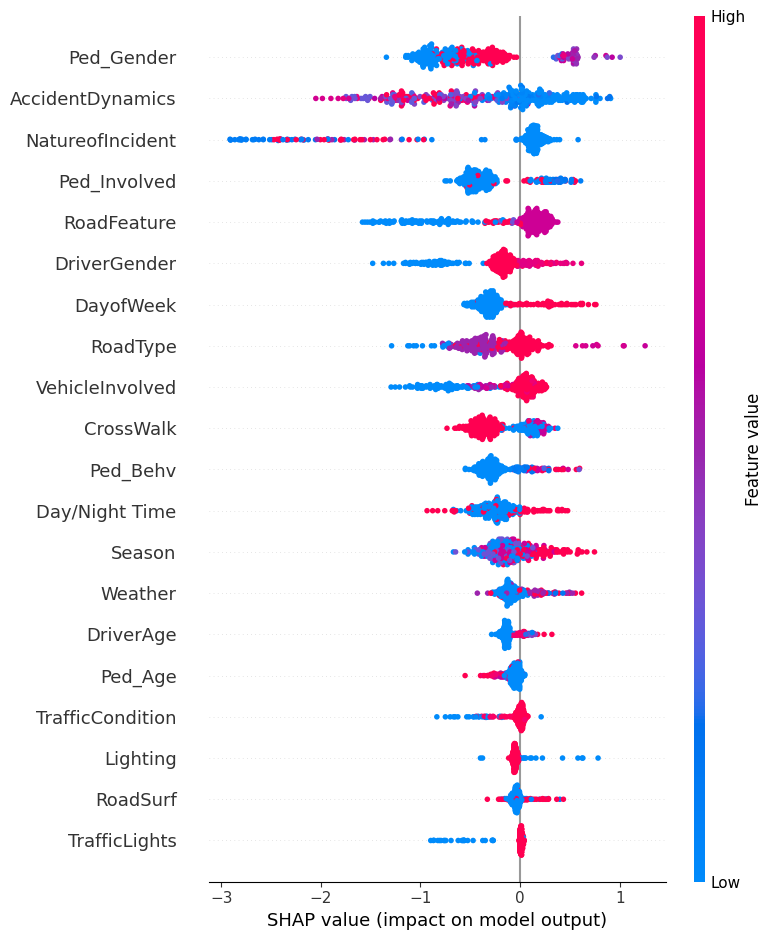

In [18]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_catboost_model)
shap_values = explainer.shap_values(X_test)

# class wise shap summary plots using y_test to keep one class at a time
# Separate the test set into classes
# Separate the test set into classes
X_test_class_0 = X_test[y_test == 0]
X_test_class_1 = X_test[y_test == 1]

# Separate SHAP values into classes
shap_values_class_0 = shap_values[y_test == 0]
shap_values_class_1 = shap_values[y_test == 1]


shap.summary_plot(shap_values_class_0, X_test_class_0)

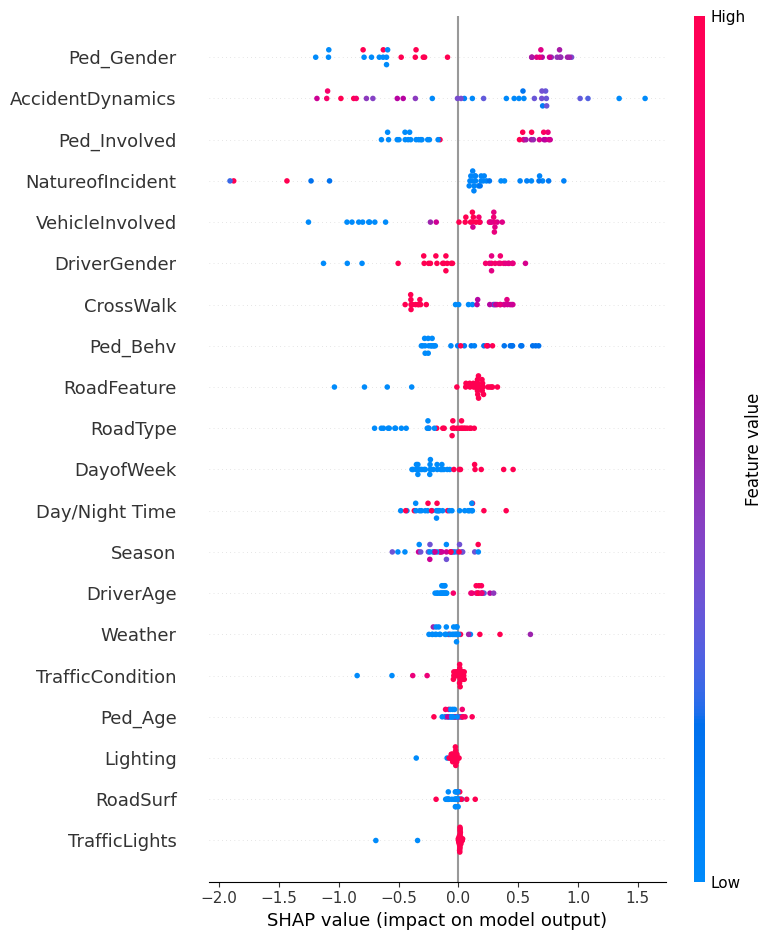

In [20]:
shap.summary_plot(shap_values_class_1, X_test_class_1)

In [16]:
X_test.shape

(400, 22)

In [17]:
shap_values.shape

(400, 22)

In [22]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
X, y = make_classification(n_classes=3, class_sep=2,
weights=[0.15, 0.8, 0.05], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 800, 0: 150, 2: 50})
Resampled dataset shape Counter({2: 800, 1: 800, 0: 800})


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


rand_forest = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=10,
                                     random_state=42)
rand_forest.fit(X_train_res, y_train_res)

print(f"Baseline accuracy on test data: {rand_forest.score(X_test, y_test):.2}")

y_pred = rand_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, rand_forest.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Macro): {f1_macro}")
print(f"AUC: {auc}")



Baseline accuracy on test data: 0.94
Accuracy: 0.945
F1 Score (Micro): 0.945
F1 Score (Macro): 0.7737556561085972
AUC: 0.7489059532656263


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300, 600, 900, 1000],
    'max_depth': [4, 6, 8, 10],
    'max_features': [4,8,10,12,16],
     'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rand_forest = RandomForestClassifier(verbose=0)

# Perform grid search
grid_search = GridSearchCV(estimator=rand_forest, param_grid=param_grid,
                           scoring='f1_macro', cv=5, n_jobs=12, verbose=1)
grid_search.fit(X_train_res, y_train_res)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

rand_forest = RandomForestClassifier(**best_params, verbose=0)

rand_forest.fit(X_train_res, y_train_res)

print(f"Baseline accuracy on test data: {rand_forest.score(X_test, y_test):.2}")

y_pred = rand_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_catboost_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Macro): {f1_macro}")
print(f"AUC: {auc}")





Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 12, 'min_samples_leaf': 1, 'n_estimators': 900}
Baseline accuracy on test data: 0.94


NameError: name 'best_catboost_model' is not defined

In [13]:
rand_forest = RandomForestClassifier(**best_params, verbose=0)

rand_forest.fit(X_train_res, y_train_res)

print(f"Baseline accuracy on test data: {rand_forest.score(X_test, y_test):.2}")

y_pred = rand_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, rand_forest.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Macro): {f1_macro}")
print(f"AUC: {auc}")


Baseline accuracy on test data: 0.94
Accuracy: 0.9375
F1 Score (Micro): 0.9375
F1 Score (Macro): 0.7559487492373398
AUC: 0.7466765750144496


/tmp/ipykernel_224931/1000231287.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


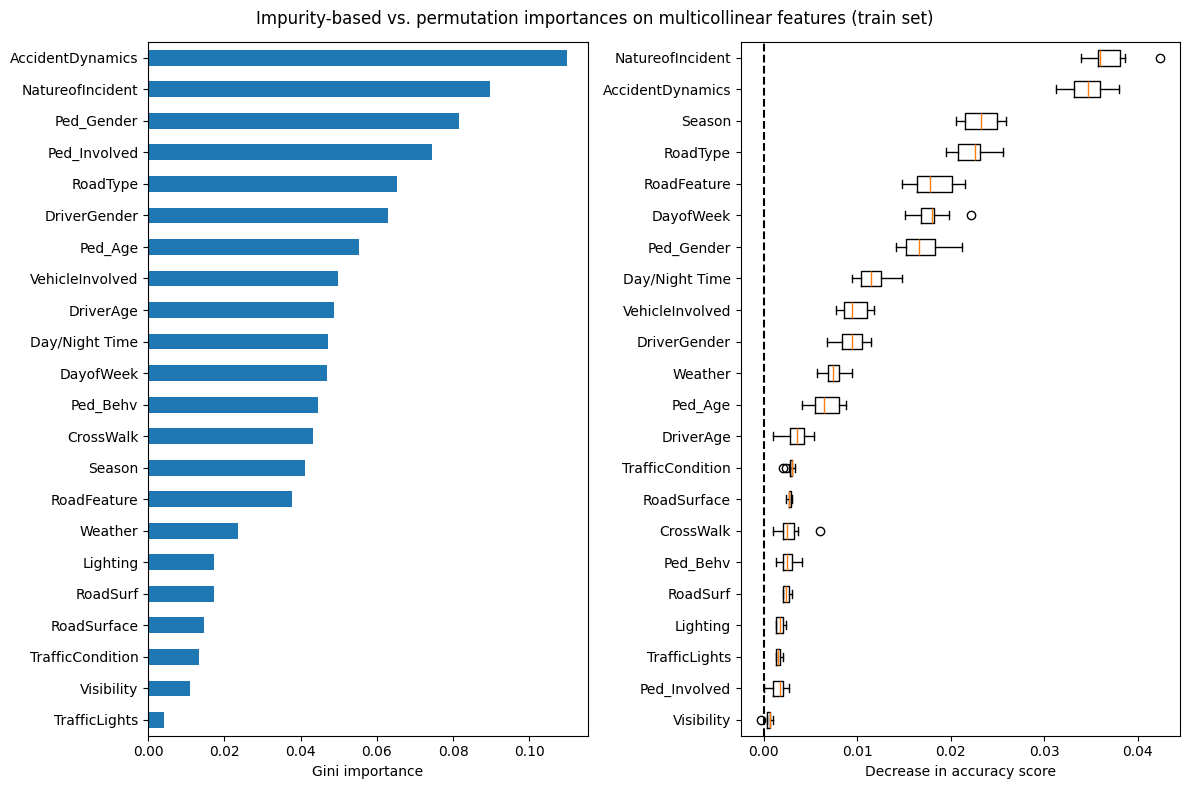

In [36]:
from sklearn.inspection import permutation_importance
def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax
mdi_importances = pd.Series(rand_forest.feature_importances_, index=X_train_res.columns)
tree_importance_sorted_idx = np.argsort(rand_forest.feature_importances_)
tree_indices = np.arange(0, len(rand_forest.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(rand_forest, X_train_res, y_train_res, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

/tmp/ipykernel_224931/1000231287.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


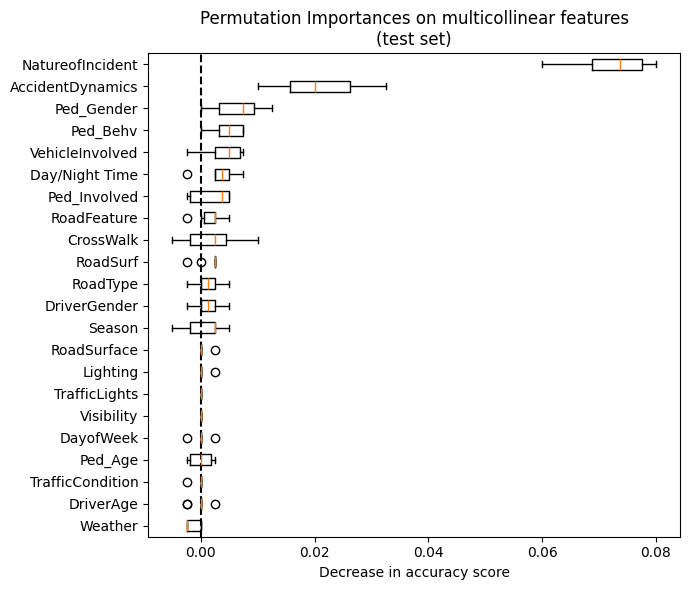

In [37]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_permutation_importance(rand_forest, X_test, y_test, ax)
ax.set_title("Permutation Importances on multicollinear features\n(test set)")
ax.set_xlabel("Decrease in accuracy score")
_ = ax.figure.tight_layout()

In [40]:
df_imputed.drop(columns=['Injury_Severity'])

,Day/Night Time,Season,Ped_Involved,Ped_Age,Ped_Gender,VehicleInvolved,DriverAge,DriverGender,Ped_Behv,NatureofIncident,...,RoadFeature,RoadSurface,RoadType,RoadSurf,Weather,Lighting,TrafficLights,Visibility,TrafficCondition,DayofWeek
0,0.0,3.0,0.000000,0.000000,1.000000,2.000000,0.00000,1.000000,1.000000,0.000000,...,1.0,0.000000,1.000000,0.0,1.0,1.0,1.0,0.0,1.000000,0.0
1,0.0,3.0,1.000000,0.000000,2.000000,2.000000,0.00000,1.000000,1.000000,0.000000,...,1.0,0.000000,1.000000,0.0,1.0,1.0,1.0,0.0,1.000000,1.0
2,1.0,3.0,0.000000,0.000000,0.000000,2.000000,0.00000,1.000000,1.000000,0.000000,...,3.0,0.000000,0.000000,0.0,0.0,1.0,1.0,0.0,1.000000,0.0
3,1.0,3.0,0.000000,0.000000,1.000000,2.000000,0.00000,1.000000,1.000000,0.000000,...,3.0,0.021367,2.000000,0.0,0.0,0.0,1.0,1.0,1.000000,0.0
4,0.0,3.0,0.000000,0.000000,1.000000,2.000000,0.00000,0.000000,1.435114,0.000000,...,1.0,0.000000,1.330029,0.0,0.0,1.0,1.0,0.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,3.0,0.000000,0.000000,0.000000,2.000000,0.00000,1.000000,1.000000,0.000000,...,3.0,0.000000,3.000000,0.0,0.0,1.0,1.0,0.0,1.000000,0.0
1995,0.0,3.0,0.000000,0.000000,1.000000,2.000000,0.00000,1.000000,1.000000,0.000000,...,3.0,0.000000,2.000000,1.0,1.0,1.0,1.0,0.0,0.000000,0.0
1996,0.0,3.0,0.068482,0.042105,0.474744,1.463952,0.00719,0.760384,1.418380,0.197503,...,3.0,0.000000,1.441376,0.0,0.0,1.0,1.0,0.0,0.907595,0.0
1997,0.0,3.0,0.000000,0.000000,1.000000,2.000000,0.00000,0.000000,1.000000,0.000000,...,4.0,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,1.000000,1.0


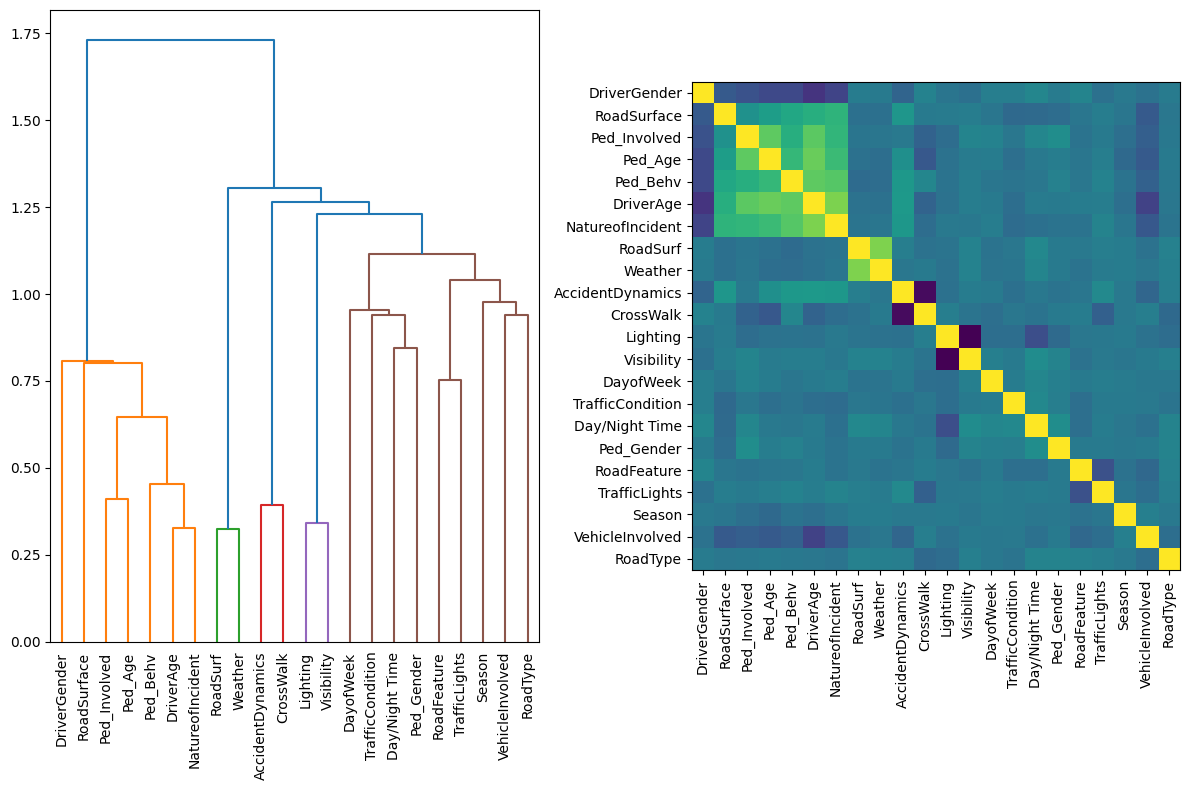

In [41]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(df_imputed.drop(columns=['Injury_Severity'])).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=df_imputed.drop(columns=['Injury_Severity']).columns.to_list(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
_ = fig.tight_layout()